In [1]:
from sklearn.datasets import make_classification

import pandas as pd

# Dataset: 5000 filas, 10 features, 5% clase 1 (fraudes)
X, y = make_classification(
    n_samples=5000,
    n_features=10,
    n_informative=6,
    n_redundant=2,
    n_classes=2,
    weights=[0.95],  # 95% clase 0 (normal), 5% clase 1 (fraude)
    flip_y=0,        # sin ruido aleatorio
    random_state=42
)

# Convertimos a DataFrame
df = pd.DataFrame(X, columns=[f"V{i+1}" for i in range(X.shape[1])])
df["Class"] = y

# Verificamos proporción
# print(df["Class"].value_counts(normalize=True))
print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.975138  0.449289  2.586427  0.723372  4.805813  0.045900  4.853292   
1 -2.200185  0.284884 -0.606346  3.847072 -4.193278 -0.767398  0.196373   
2  0.080280  1.075411 -5.026960  0.562892 -6.989144  0.901010 -1.700581   
3 -0.687892  0.760602 -2.380047  1.694105 -4.080378 -0.307845 -0.343182   
4 -0.141228 -0.789224 -1.338616  1.100506 -1.328494 -1.995871 -0.124438   

         V8        V9       V10  Class  
0  1.964607  1.137967  0.768737      0  
1 -2.281460  0.876246 -0.532845      0  
2 -1.295777  0.020475  0.764732      0  
3 -1.312154  0.624057 -1.232520      0  
4 -0.482302  1.352956  0.698166      0  


In [2]:
print(df["Class"].value_counts(normalize=True))

Class
0    0.95
1    0.05
Name: proportion, dtype: float64


In [3]:
#Train test split
from sklearn.model_selection import train_test_split
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 10)
(1000, 10)
(4000,)
(1000,)


In [4]:
# We create the regression model, we train it, we predict and finally we predict the probability 
from sklearn.linear_model import LogisticRegression
# Creation
model = LogisticRegression(class_weight="balanced", max_iter=1000, solver="lbfgs", random_state=42)
# Training
model.fit(X_train, y_train)
# Probability
y_proba = model.predict_proba(X_test)[:, 1]
# Prediction
y_pred = model.predict(X_test)

print("PREDICTION: ")
print(y_pred)
print("PROBABILITY: ")
print(y_proba)

PREDICTION: 
[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0
 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0
 1 0 0 0 0 0

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# How many predictions has accerted
acc = accuracy_score(y_test, y_pred)
# Table of predictions
pred_table = confusion_matrix(y_test, y_pred)
# Classification report 
report = classification_report(y_test, y_pred)
print("How good is the model")
print(acc)

print("Prediction Table")
print(pred_table)

# Try with new treshholds
for threshold in [0.5, 0.4, 0.3, 0.2]:
    y_pred_thresh = (y_proba >= threshold).astype(int)
    print(f"\nThreshold = {threshold}")
    print(classification_report(y_test, y_pred_thresh))

How good is the model
0.765
Prediction Table
[[723 227]
 [  8  42]]

Threshold = 0.5
              precision    recall  f1-score   support

           0       0.99      0.76      0.86       950
           1       0.16      0.84      0.26        50

    accuracy                           0.77      1000
   macro avg       0.57      0.80      0.56      1000
weighted avg       0.95      0.77      0.83      1000


Threshold = 0.4
              precision    recall  f1-score   support

           0       0.99      0.69      0.81       950
           1       0.12      0.84      0.22        50

    accuracy                           0.69      1000
   macro avg       0.56      0.76      0.51      1000
weighted avg       0.94      0.69      0.78      1000


Threshold = 0.3
              precision    recall  f1-score   support

           0       0.99      0.60      0.75       950
           1       0.10      0.88      0.19        50

    accuracy                           0.61      1000
   macro 

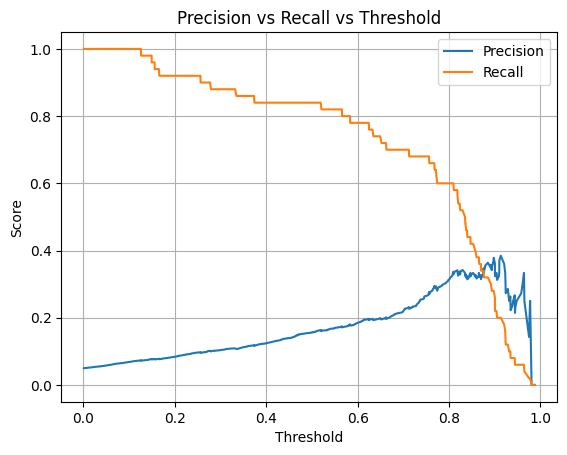

In [9]:
# Graphs
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs Recall vs Threshold')
plt.grid()
plt.legend()  # 👈 ESTA LÍNEA AGREGA LAS LABELS
plt.show()

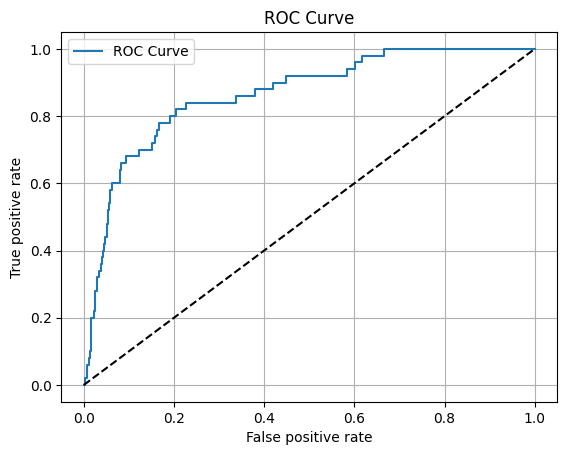

AUC
0.8651578947368421


In [10]:
#		fpr: false positive rate
#		tpr: true positive rate (recall)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.grid()
plt.legend()  # 👈 ESTA LÍNEA AGREGA LAS LABELS
plt.show()
print("AUC")
print(roc_auc_score(y_test, y_proba))

In [12]:
final_pred = (y_proba >= 0.3).astype(int)
print(classification_report(y_test, final_pred))

              precision    recall  f1-score   support

           0       0.99      0.60      0.75       950
           1       0.10      0.88      0.19        50

    accuracy                           0.61      1000
   macro avg       0.55      0.74      0.47      1000
weighted avg       0.95      0.61      0.72      1000

